### Linear model study

### Concepts

##### linear estimation

linear estimation : calculate the equation with linear variation of a set of independent variables who predict/estimate the dependent variable
The linear equation is given by:

$$
\hat{y} = mx + m_1x_1 + e
$$

where:
- \( y \) is the dependent variable,  
- \( x \) is the independent variable,  
- \( m \) is the slope (rate of change),  
- \( b \) is the y-intercept (value of \( y \) when \( x = 0 \)).
 and the m's can be multiples if there is more than one independent variable

 we do that by optimizing the Mean Squared Errors wich can be written as:
 1. $$MSE = J(w, b) = \frac{1}{N} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)^2$$
 2. $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
 3. $$MSE = \frac{1}{n} \| \mathbf{y} - \hat{\mathbf{y}} \|^2$$




##### Gradient Descent 

Technique wich given a parameter value (beta_1 or in this examples "w"), we calculate wich direction we should move the parameter given the derivatives of the point until we reach de global minimum value of the error function explained by the parameter. This should minimize the MSE of the function. 

To reach this, we calculate the value of the error function in the initial value of the parameter and multiply it with a **learning rate**. Then, we subtract from the weight or the bias. This will give us the new parameter, and we do it until the derivative value is equal to zero.

the **learning rate** tell the model how fast or slow the variation of the parameter is happening, it can me really fast and get to the point with risk of jump the Global cost minimum point or  can be very slow and be more presice with a time and process cost.
<p align="center">
<img src="gradient_descendent.png" alt="Gradient Descendent" width="420"/>
</p>

Function cost:
$$
J(\mathbf{w}, b) = \frac{1}{n} \left\| X\mathbf{w} + b - \mathbf{y} \right\|^2
$$

Gradient in relation to w
$$
\nabla_{\mathbf{w}} J = \frac{2}{n} X^\top (X\mathbf{w} + b - \mathbf{y})
$$
Gradient in relation to b:
$$
\nabla_{b} J = \frac{2}{n} \sum_{i=1}^{n} \left[(X\mathbf{w} + b - \mathbf{y})_i\right]
$$


##### Steps to implement:

- Training:
  - Initialize weights as zero  
  - Initialize bias as zero  

- Given a data point:  
  - Predict result by using \( f(x) = wx + b \)  
  - Calculate error  
  - Use gradient descent to figure out new weight and bias  
  - Repeat *n* times  

### Implementation

###### Preparing the data

In [2]:
import pandas as pd
import numpy as np

In [3]:

path = r"C:\Users\diego\OneDrive\Área de Trabalho\Estudo\DAdos\git\ml_studies\linear model\data\Enhanced_pizza_sell_data_2024-25.xlsx"
data = pd.read_excel(path)

In [4]:
df = data.copy()

In [5]:
# Linear Regressor
class LinearRegressor:
    def __init__(self, learning_r = .01, max_interations = 1200, tolerance = 1e-6 ):
        self.learning_r = learning_r # parameter
        self.max_interations = max_interations # parameter
        self.tolerance = tolerance # parameter
        self.weights = 0 # initializing the erros
        self.bias = None # Initializing the bias
        self.cost_history = []
        
    def _add_bias_column(self,X):
        return np.column_stack(np.ones(X.shape[0],X))
    
    def mse_cost(self,X,y,weights,bias):
        n = X.shape[0]
        
        #Linear prediction
        predictions = X @ weights + bias
        
        #MSE
        cost = (1/(2*n)) * np.sum((predictions-y) ** 2)
        return cost
    def compute_gradients(self,X, y, weights, bias):
        n = X.shape[0]
        predictions = X @ weights + bias
        error = predictions - y
        grad_w = (2/n) * X.T @ error   # Gradiente corrigido (fator 2)
        grad_b = (2/n) * np.sum(error) # Gradiente corrigido (fator 2)
        return grad_w, grad_b
        
        return grad_w,grad_b
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        
        # Initialize parameters
        self.weights = np.random.normal(0,0.01,n_features)
        self.bias = 0.0
        
        self.cost_history = []
        
        for i in range(self.max_interations):
            # Current cost -> gradients -> update parameters -> check convergence -> if converge, break
            current_cost = self.mse_cost(X,y,self.weights,self.bias)
            self.cost_history.append(current_cost)
            
            # gradients
            grad_w,grad_b = self.compute_gradients(X,y,self.weights,self.bias)
            # update parameters
            new_weights = self.weights - self.learning_r * grad_w
            new_bias = self.bias - self.learning_r * grad_b
            
            # check convergence:
            if i>0:
                cost_change = abs(self.cost_history[-2] - current_cost) 
                if cost_change < self.tolerance:
                    print(f"Converge after {i+1} iterations")
                    break
            self.weights = new_weights
            self.bias = new_bias
                
    def prediction(self,X):
        return X @ self.weights + self.bias
    
    def r_score(self,X,y):
        predictions = self.prediction(X)
        ss_res = np.sum((y-predictions)**2) # dif y prediction squared
        ss_tot = np.sum((y-np.mean(y)) **2) # dif y mean squared
        return 1 - (ss_res/ss_tot) # R^2
    

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Colunas categóricas para one-hot encoding
categorical_cols = ["Pizza Size", "Traffic Level", "Payment Method"]

# Aplicar OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Definir sparse_output=False para evitar matriz esparsa
encoded_data = encoder.fit_transform(df[categorical_cols])  # Já retorna um array denso
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Selecionar colunas numéricas e booleanas
numeric_cols = df.select_dtypes(include=["int64", "float64", "bool"]).columns
final_df = pd.concat([df[numeric_cols], encoded_df], axis=1)

# Converter booleanos para 0 e 1
final_df = final_df.astype({"Is Peak Hour": int, "Is Weekend": int, "Is Delayed": int})

Question : Higher traffic level leads to more pizza orders?

In [7]:
final_df.head(2)

,Delivery Duration (min),Toppings Count,Distance (km),Is Peak Hour,Is Weekend,Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Is Delayed,...,Pizza Size_Medium,Pizza Size_Small,Pizza Size_XL,Traffic Level_Low,Traffic Level_Medium,Payment Method_Cash,Payment Method_Domino's Cash,Payment Method_Hut Points,Payment Method_UPI,Payment Method_Wallet
0,15,3,2.5,1,0,6.0,1.2,6.0,9.0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,25,4,5.0,1,0,5.0,0.8,12.0,13.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
y = final_df['Delay (min)']
X = final_df.drop(columns = ['Delay (min)'])

<Axes: >

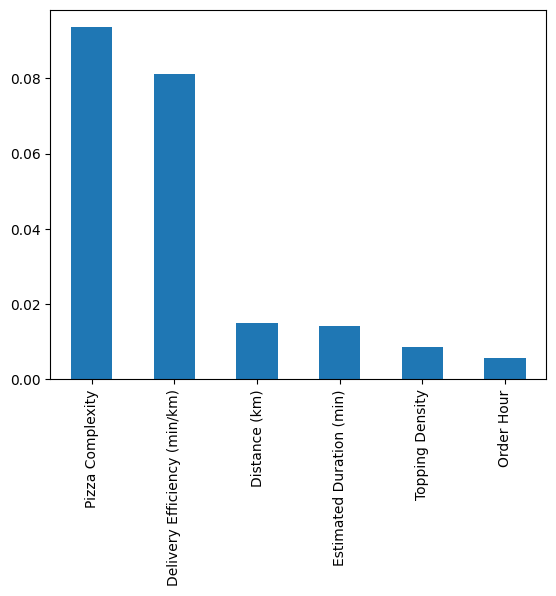

In [9]:
from sklearn.ensemble import RandomForestRegressor  
model = RandomForestRegressor().fit(X, y)  
feature_importance = pd.Series(model.feature_importances_, index=X.columns)  
feature_importance = feature_importance.sort_values(ascending = False)
choices = feature_importance[2:]
choices = choices[:6]
choices.plot.bar()

In [10]:
choices.index

Index(['Pizza Complexity', 'Delivery Efficiency (min/km)', 'Distance (km)',
       'Estimated Duration (min)', 'Topping Density', 'Order Hour'],
      dtype='object')

In [11]:
# X = final_df[['Pizza Complexity','Traffic Impact',"Is Weekend","Distance (km)","Is Peak Hour"]]
X = final_df.loc[:,choices.index]

###### Creating the linear regression class

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pizza Complexity              1004 non-null   int64  
 1   Delivery Efficiency (min/km)  1004 non-null   float64
 2   Distance (km)                 1004 non-null   float64
 3   Estimated Duration (min)      1004 non-null   float64
 4   Topping Density               1004 non-null   float64
 5   Order Hour                    1004 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
model = LinearRegressor(learning_r = 0.01)

In [18]:
model.fit(X_train_scaled,y_train)

Converge after 994 iterations


In [19]:
# make predictions
train_predictions = model.prediction(X_train_scaled)
test_predictions = model.prediction(X_test_scaled)

In [20]:
# Scores:
train_scores = model.r_score(X_train_scaled, y_train)
test_scores = model.r_score(X_test_scaled, y_test)

In [21]:
print(f'R-Squared Train :{train_scores:.2f}')
print(f'R-Squared Test:{test_scores:.2f}')

R-Squared Train :0.81
R-Squared Test:0.82


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

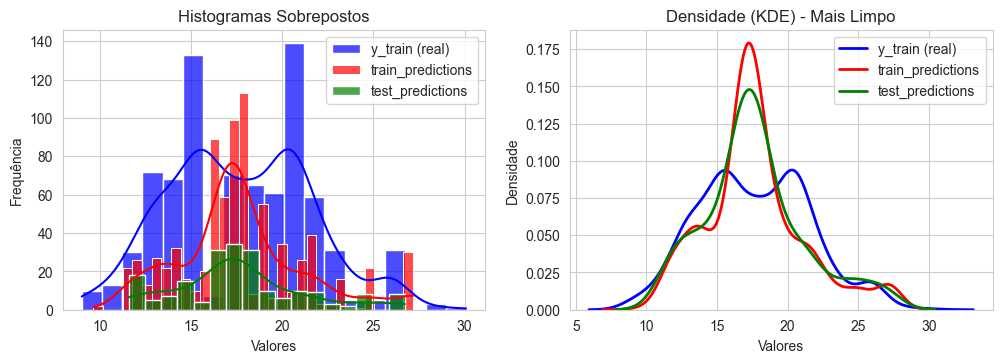

In [23]:

"""Histogramas sobrepostos com transparência"""
plt.figure(figsize=(12, 8))

# Plot 1: Histogramas sobrepostos
plt.subplot(2, 2, 1)
sns.histplot(y_train, alpha=0.7, label='y_train (real)', color='blue', kde=True)
sns.histplot(train_predictions, alpha=0.7, label='train_predictions', color='red', kde=True)
sns.histplot(test_predictions, alpha=0.7, label='test_predictions', color='green', kde=True)
plt.title('Histogramas Sobrepostos')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()

# Plot 2: Apenas KDE (mais limpo)
plt.subplot(2, 2, 2)
sns.kdeplot(y_train, label='y_train (real)', color='blue', linewidth=2)
sns.kdeplot(train_predictions, label='train_predictions', color='red', linewidth=2)
sns.kdeplot(test_predictions, label='test_predictions', color='green', linewidth=2)
plt.title('Densidade (KDE) - Mais Limpo')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend()



    

#### Possíveis melhorias

### as predições estão senfo mais frequentes no centro da distribuição do que os dados reais. 
Em termos de negócios, o modelo vai indicar que há mais pedidos com atraso de aproximadamente 16 a 19 minutos do que a realidade. Quando o atraso real é menor que o previsto, não há problemas, a diferença é pouca. Em contrapartida quando o atraso é maior que isso pode gerar desconforto nos clientes que esperavam atrasar em X minutos porém tiveram que esperar mais do que isso.

#### Possíveis soluções:
- Testar com um modelo do tipo forest, dado que não assume relação linear entre as variáveis, ele pode ser mais certeiro nesse caso.
- Realizar técnicas de Cross-Validation  : Base de dados é pequena, logo, usar o cross validation pode tirar melhor proveito dos dados.
- Utilizar uma modelagem de resíduos a partir das predições e utiliza-lo pra corrigir a predição.

### Objetivo de praticar regressão linear:
Entendo que o objetivo foi cumprido. Consegui reviver a noção de implementação do Gradiente Descendente e correlacionar isso com a estatística matricial de cálculo de regressão linear onde
$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

A diferença é que com o gradiente descentende focamos em reduzir o erro entre a curva de regressão e os dados reais através do Gradinte Descendente por um processo iterativo, enquanto no cálculo que aprendi na faculdade focamos em reduzir o erro via processo de otimização ( Derivar a fórmula do erro do estimador e igualar a zero).
Entendo que eles tem cálculos bem parecidos com objetivos diferentes, o primeiro busca acertar o *y* enquanto o segundo busca acertar o *betha*.
